In [ ]:
print('hola123')

In [41]:
#imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

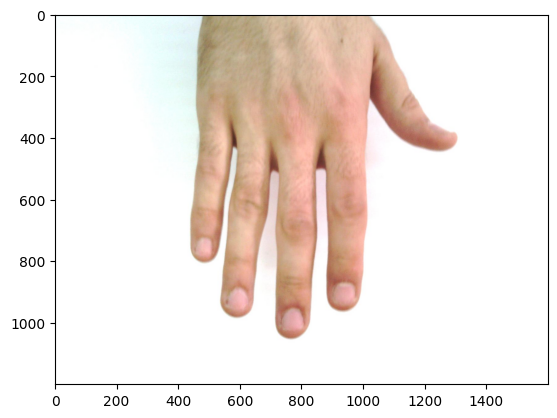

In [161]:
img = mpimg.imread('/home/Projects/dataset/Hands/Hand_0000002.jpg')
imgplot = plt.imshow(img)
plt.show()

In [2]:
csv_path = '/home/Projects/dataset/HandInfo.csv'
df = pd.read_csv(csv_path)
imageName = df['imageName'].values
id = df['id'].values
age = df['age'].values
labels = (id,age)
#print(type(imageName))
#print(df)


In [100]:
#CREATE ALL FOLDERS
ids = df['id'].unique()
#print(ids)
dataset_path = '/home/Projects/dataset/Hands/'

def create_folders(folder_name):
    #print(folder_name)
    # checking if the directory demo_folder 
    # exist or not.
    if not os.path.exists(folder_name):        
            # if the demo_folder directory is not present 
            # then create it.
            #os.remove(folder_name)
            os.makedirs(folder_name)
    
for idx in ids:
    test_folder_name = dataset_path + 'test/' + str(idx)
    train_folder_name = dataset_path + 'train/' + str(idx)
    create_folders(test_folder_name)
    create_folders(train_folder_name)
    

In [102]:
train_PCNT = 0.8
test_PCNT  = 1 - train_PCNT

def move_files(labelId):
    moved_files_train = 0
    moved_files_test = 0
    indexID_ = df.index[df['id']==labelId].tolist() 
    random.shuffle(indexID_)
    listLen = len(indexID_)
    train_quantity_samples = math.floor(listLen*train_PCNT)
    
    for i in range(0,listLen):
        src_path = dataset_path 
        if i < train_quantity_samples:
            dst_path = src_path + 'train/' + str(labelId) + '/'  + imageName[indexID_[i]]
        else:
            dst_path = src_path + 'test/' + str(labelId)  + '/' + imageName[indexID_[i]]

        src_path = dataset_path + imageName[indexID_[i]]
        if os.path.isfile(src_path):
            if 'train' in dst_path:
                moved_files_train = moved_files_train + 1
            else:
                moved_files_test = moved_files_test + 1
            
            os.rename(src_path, dst_path)
            #print(src_path)
            #print(dst_path)
        else:
            print('El archivo {} NO Existe', src_path)

    return (moved_files_train, moved_files_test)


In [106]:
print(len(imageName))
aux_train = 0
aux_test = 0
for idx in ids:
    aux = move_files(idx)
    aux_train = aux_train + aux[0]
    aux_test = aux_test + aux[1]

print(aux_train)
print(aux_test)

11076
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0010007.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0000072.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009978.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009957.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0000067.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009965.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009998.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0000049.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009977.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009956.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009960.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009980.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0010006.jpg
El archivo {} NO Existe /home/Projects/dataset/Hands/Hand_0009983.jpg
El archivo {} 

In [105]:
batch_size = 100
IMG_SHAPE = 150 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=dataset_path + 'train/',
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 8786 images belonging to 189 classes.
